## 앙상블 학습 Ensemble Learning 개요
- 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
- 대표적인 앙상블 알고리즘은 랜덤 포레스트와 그래디언트 부스팅(GBM)
- 뛰어난 성능과 쉬운 사용, 다양한 활용도로 많이 애용 되어 왔음
- 전통적인 앙상블 학습의 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting) 3가지
- 이외에 스태킹 등 다양한 앙상블 방법
### 보팅과 배깅
- 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 보팅의 경우엔 일반적으로 서로 다른 알고리즘의 분류기가 공통적으로 전체 dataset을 공유하며 결합하는 것
- 배깅은 같은 유형의 알고리즘을 가진 분류기가 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
- 대표적인 배깅 방식이 랜덤 포레스트 알고리즘
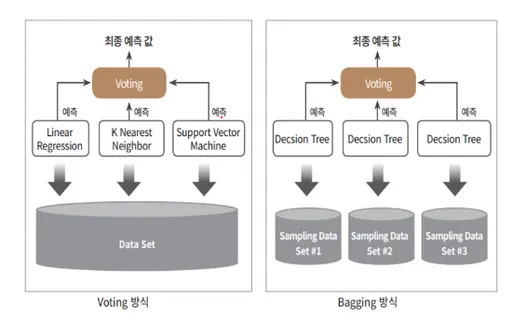
### 부스팅
- 부스팅은 여러 개의 분류기가 순차적으로 학습을 수행
- 앞에서 학습한 분루기 예측이 틀린 데이터에 대해서 다음 분류기에게는 가중치(weight)를 부여 하면서 학습과 예측을 진행하는 것
- 예측 성능이 뛰어나 앙상블 학습을 주도
- 대표적인 부스팅 모듈 : 그래디언트 부스트, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)
### 스태킹
- 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

### 보팅 유형
#### 하드 보팅(Hard Voting)
- 다수결 원칙과 비슷
- 예측 결과들중 다수의 분류기가 결정한 예측 값을 최종 보팅 결과값으로 선정하는 것
#### 소프트 보팅(Soft Voting
- 분류기들의 label 값 결정 확률을 모두 더하고 이를 평균
- 이들 중 확률이 가장 높은 label 값을 최종 보팅 결과값으로 선정
- 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용


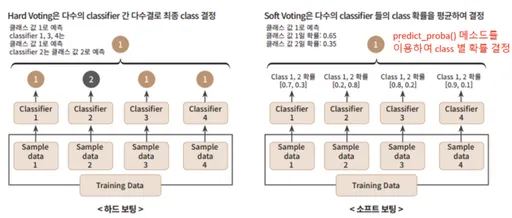
#### 보팅 분류기 Voting Classifier
- 사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스를 제공
#### 위스콘신 유방암 dataset을 예측 분석
- 위스콘신 유방암 dataset은 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 dataset
- 로지스틱 회귀와 KNN(K Nearest Neighbor)을 기반으로 보팅 분류기 생성


./data/UCI_HAR_Dataset

In [15]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [16]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기,  voting은 defalut는 'hard'
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))


Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 결과를 보면 보팅 분류기가 조금 높게 나왔는데, 보팅으로 여러 분류기를 결합한다고 해서 무조건 성능이 향상되는 것은 아님
- 데이터의 특성과 분포등 다양한 요건에 따라 오히려 기반 분류기중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수도 있음
- 그럼에도 불구하고 앙상불 방법은 전반적으로 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음
- 고정된 dataset에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도 현실의 다른 데이터들은 다양한 변수와 예측이 어려운 규칙으로 구성
- 실제 환경에서는 성능을 이끌어 내지 못할 수 있음
- 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 끌어 낼수 있음
- ML 모델이 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML의 평가 요소


### Random Forest 개요
- 배깅(Bagging)의 대표적인 알고리즘
- 앙상블 알고리즘 중 비교적 빠른 수행 속도
- 다양한 영역에서 높은 예측 성능
- 기반 알고리즘은 결정 트리이며 장점인 쉽고 직관적인 장점
- 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반으로 채택
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링
- 개별적으로 학습을 수행한 후 최종적으로 모든 분류기가 보팅을 통해 예측 결정


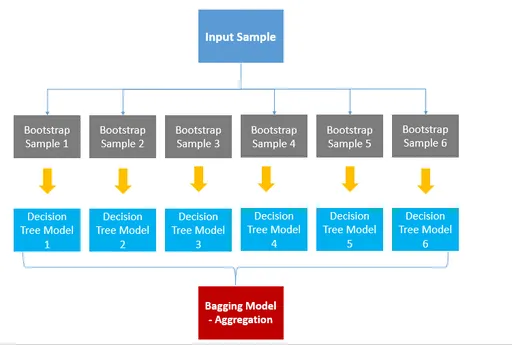

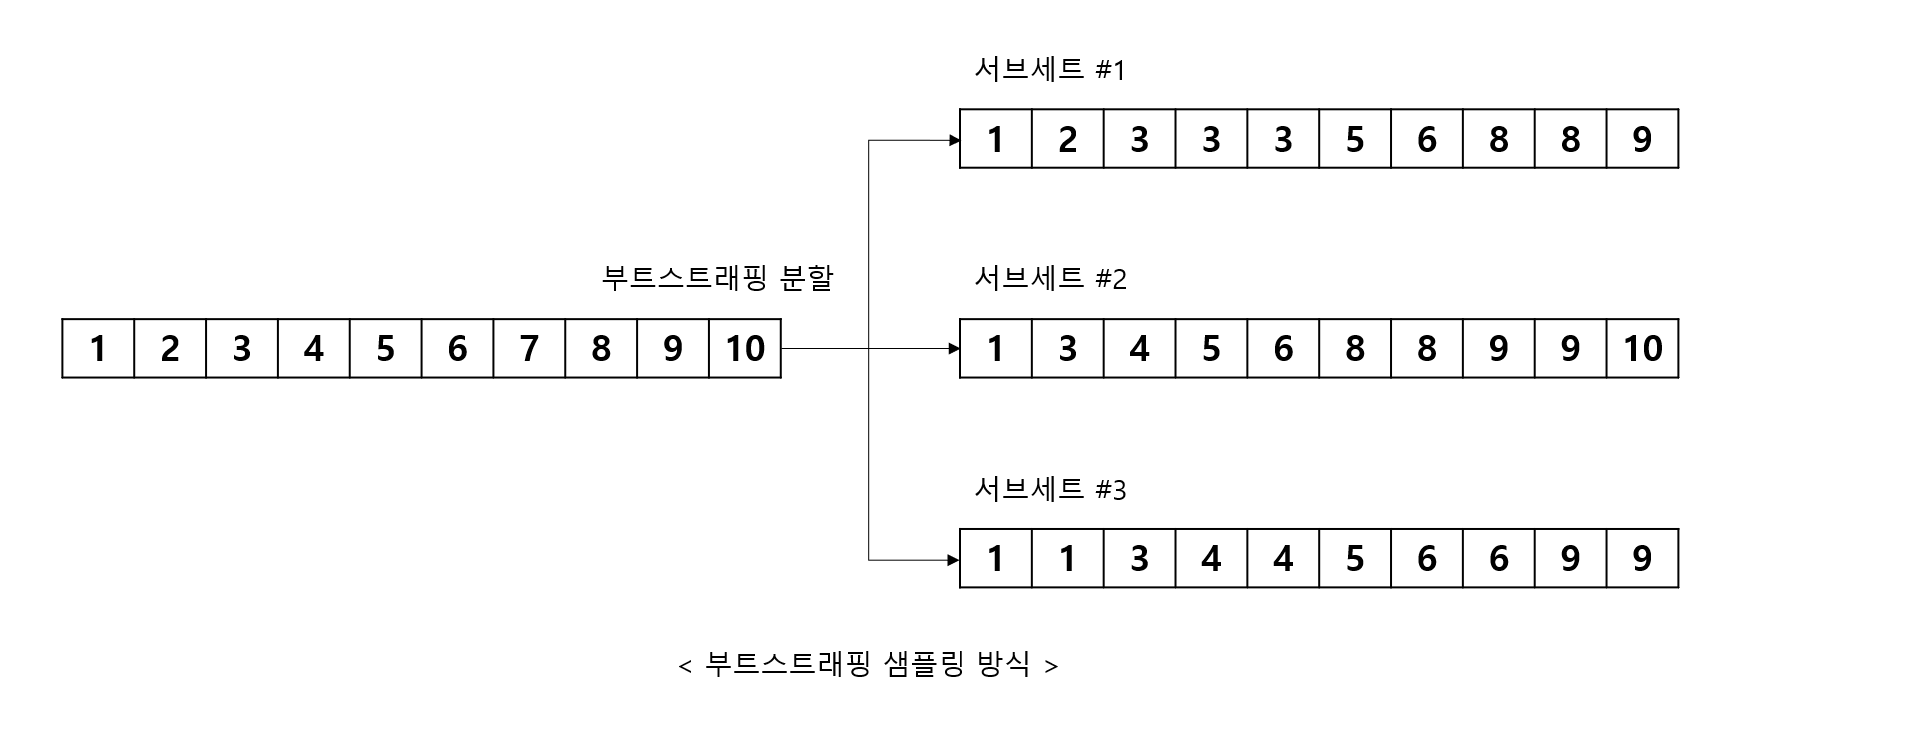

- 랜덤 포레스트는 각각의 개별적인 결정 트리가 학습하는 dataset이 전체 dataset에서 일부가 중첩되게 샘플링된 dataset
- 부트스트래핑(bootstrapping) 분할 방식 : 여러 개의 dataset을 중첩되게 분리하는 것
- bagging이 bootstrap aggregating의 줄임말
- 원래 부트스트랩은 통계학에서 여러 개의 작은 dataset을 임의로 만들어 개별 평균의 분포도를 측정하는 목적 등을 위한 샘플링 방식을 지칭

### 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원

In [17]:
# 사용자 행동 인식 dataset을 이용하여 예측을 수행
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./data/UCI_HAR_Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/UCI_HAR_Dataset/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/UCI_HAR_Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/UCI_HAR_Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./data/UCI_HAR_Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))


랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
#### 트리 기반의 앙상블 알고리즘의 단점
- hyper parameter가 너무 많아 튜닝 시간이 많이 소모되는 것
- 많은 시간을 소모하여 튜닝을 한 후에도 예측 성능은 크게 상향되지 않음
- 랜덤 포레스트가 적은 편에 속하는데 결정 트리를 사용하여 hyper parameter가 대부분 동일하기 때문
#### 랜덤 포레스트 하이퍼 파라미터
- n_estimate : 결정 트리의 개수, default 10개
- max_features : 결정트리의 auto default
- max_depth나 min_samples_leaf 동일
#### GridSearchCV를 통해 parameter 튜닝
- 랜덤포래스트는 CPU 병렬 처리에 효과적
- n_jobs=-1 : CPU 코어수 , -1이면 모든 CPU 코어 사용

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , 
                       cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


최고 예측 정확도: 0.9180

n_estimators=300 으로 늘려서 재학습 시켜보자. 

In [20]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


예측 정확도: 0.9165


featureimportances 중요한 피처 확인


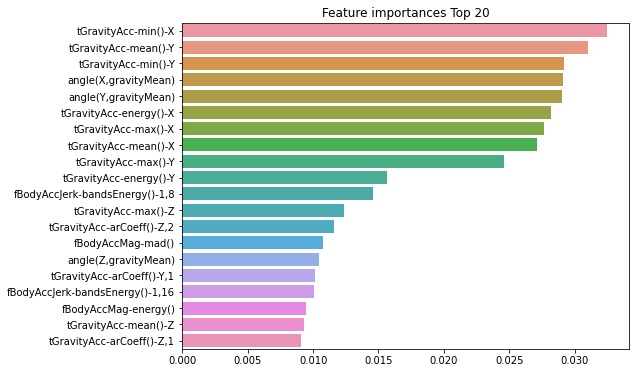

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()


### GBM(Gradient Boosting Machine)
#### GBM의 개요 및 실습
- 여러개의 약한 학습기(weak learner)를 순차적으로 학습/예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)과 그래디언트 부스트(Gradient Boost)
#### 에이다 부스트(AdaBoost)
- 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘


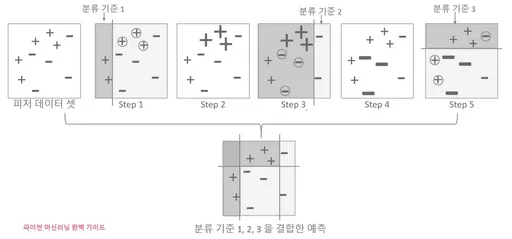

- 이미지처럼 "+"와 "-"로 구성된 피쳐 dataset
- weak learner 분류기 1이 step 1에서 분류
- step 2에선 잘못 분류한 data에 가중치를 부여
- weak learner 분류기 2이 step 3에서 분류
- step 4에선 잘못 분류한 data에 더 큰가중치를 부여
- weak learner 분류기 3이 step 5에서 분류
- 학습기를 모두 결합해서 결과를 예측
- 가중치는 점점 크게 (0.3,0.5,0.8) 부여


#### 그래디언트 부스트(Gradient Boost)
- 가중치 업데이트를 경사하강법(Gradient Descent)을 이용하는 것이 가장 큰 차이
- 오류값은 (실제값-예측값)
- 이 오류 식을 최소화하는 방향으로 반복적으로 가중치를 업데이트
- GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류 뿐만 아니라 회귀도 가능
#### GBM 기반의 분류를 위해 GradientBoostinClassifier 클래스를 제공
- GBM을 이용해 사용자 행동 dataset을 예측 분류해 보고, 학습 시간도 같이 확인


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9389
GBM 수행 시간: 567.1 초 


- default 파라미터만으로 93.89%의 정확도
- 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많음
- 순차적 예측정보 보정으로 CPU 병렬처리가 안됨
- 하지만 수행 시간이 오래 걸리고 hyper parameter 튜닝도 더 많은 시간이 필요
- 수행 시간 문제는 GBM이 극복해야 할 중요한 과제


#### GBM 하이퍼 파라미터 및 튜닝
- 트리 기반 자체의 파라미터는 동일
- loss : 경사 하강법에서 사용할 비용 함수
#### learning_rate
- 학습을 진행할 때마다 적용하는 학습률
- 0 ~ 1의 값으로 지정 가능하며 defalut는 0.1
- 너무 작은 값을 적용하면 예측 성능이 높아질 가능성이 높지만 수행 시간이 오래 걸리고 반복이 완료되어도 최소 오류 값을 찾지 못할 수 있음
- 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성 높지만 수행 시간이 빠름
- learning_rate는 n_estimators와 상호 보완적으로 조합해 사용
#### n_estimators
- weak learner의 개수
- 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질수 있으나 많을수록 수행 시간이 오래 걸림
#### subsample
- weak learner가 학습에 사용하는 데이터의 샘플링 비율
- default 값은 1로 전체 학습, 0.5 이면 학습 데이터의 50%를 의미
- 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정



#### GridSearchCV를 이용하여 hyper parameter를 최적화


In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


교차 검증 세트에서 90.13%의 정확도를 보인다. 

hyper parameter 설정으로 테스트 dataset에도 적용하여 예측 정확도를 확인


In [24]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))


GBM 정확도: 0.9393
